In [1]:
#The first thing we need to do is import the packages needed for the entire assignment
import textblob as tb
import numpy as np
import pandas as pd
import nltk as nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from pathlib import Path
from textblob import TextBlob
from operator import itemgetter
from pathlib import Path
import urllib
from urllib.request import urlopen
import requests
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\coleb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#Just for fun, comparing my last paper to one of the earliest I can find
from pathlib import Path
from textatistic import Textatistic

distxt = requests.get('https://raw.githubusercontent.com/Cbhami/Coraline/master/plaintext/Dissertation.txt')

Diss = distxt.text #I need to read in my txt

firsttxt = requests.get('https://raw.githubusercontent.com/Cbhami/Coraline/master/plaintext/Paper2010.txt')

First = firsttxt.text #I need to read in my txt

readability_first = Textatistic(First)
readability_diss = Textatistic(Diss)

%precision 3
readability_first.dict()
readability_diss.dict()

ZeroDivisionError: division by zero

In [8]:
import spacy #import the large spaCY package
nlp_lg = spacy.load('en_core_web_lg') 
document4 =nlp_lg(Diss)  #converting my dissertation to a txt file_extension
document5 = nlp_lg(First)

In [9]:
docsim=document4.similarity(document5)
print(f'First Paper (2010) to Final Dissertation (2021) similarity is {docsim:.3}.')

First Paper (2010) to Final Dissertation (2021) similarity is 0.934.


In [10]:
dissblob = TextBlob(Diss)
dissblob.word_counts

defaultdict(int,
            {'a': 603,
             'phenomenological': 73,
             'study': 86,
             'of': 1154,
             'positive': 210,
             'and': 1522,
             'effective': 204,
             'leadership�s': 5,
             'influence': 60,
             'on': 235,
             'success': 135,
             'in': 607,
             'iowa': 204,
             'army': 385,
             'recruiting': 408,
             'companies': 198,
             'dissertation': 30,
             'manuscript': 3,
             'submitted': 2,
             'to': 1135,
             'northcentral': 7,
             'university': 12,
             'school': 3,
             'business': 18,
             'partial': 2,
             'fulfillment': 2,
             'the': 2338,
             'requirements': 13,
             'for': 280,
             'degree': 4,
             'doctor': 1,
             'philosophy': 1,
             'by': 114,
             'cole': 3,
             'barrett': 

In [11]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english') 

In [12]:
items2 = dissblob.word_counts.items()    #Here we assign the word count
#print(items1)
print(len(items2))

4731


In [15]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english') #We're looking specifically for English stop words
items = [item for item in items2 if item[0] not in stopwords]
df = pd.DataFrame(items2,columns = ['Word','Count']) 
df.sort_values(by='Count', ascending=False)
#print(stopwords)

,Word,Count
26,the,2338
5,and,1522
3,of,1154
19,to,1135
11,in,607
...,...,...
2889,lmx-md,1
2888,models,1
2885,partners�,1
2883,participant�s,1


In [16]:
items = [item for item in items if item[0] not in stopwords]
print(len(items))

4611


In [17]:
sorted_diss = sorted(items, key=itemgetter(1), reverse=True)

In [18]:
stopwords1 = ['“', '”', '’', '...', '.', ',', '-', '‘', 'Army Recruiting', 'Army', 'Iowa Army', 'recruiting']
sorted_diss2 = [pair for pair in sorted_diss if pair[0] not in stopwords1]
print(len(sorted_diss2))
#print(sorted_diss2)

4610


In [19]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud   
import imageio

In [20]:
diss3 = imageio.imread('Python.png')

In [21]:
wordcloud = WordCloud(width=1000, height=1000, 
    colormap='prism', max_words = 100, mask=diss3, background_color='white')

In [22]:
from pathlib import Path
DissertationText = Diss

In [23]:
#Disstext2 = [item for item in DissertationText if item[0] not in stopwords]
stopwords22 = ['Army Recruiting', 'Army']
#DT2 = [words for words in DissertationText if words not in stopwords22]
        
Diss_wordcloud = wordcloud.generate(DissertationText)

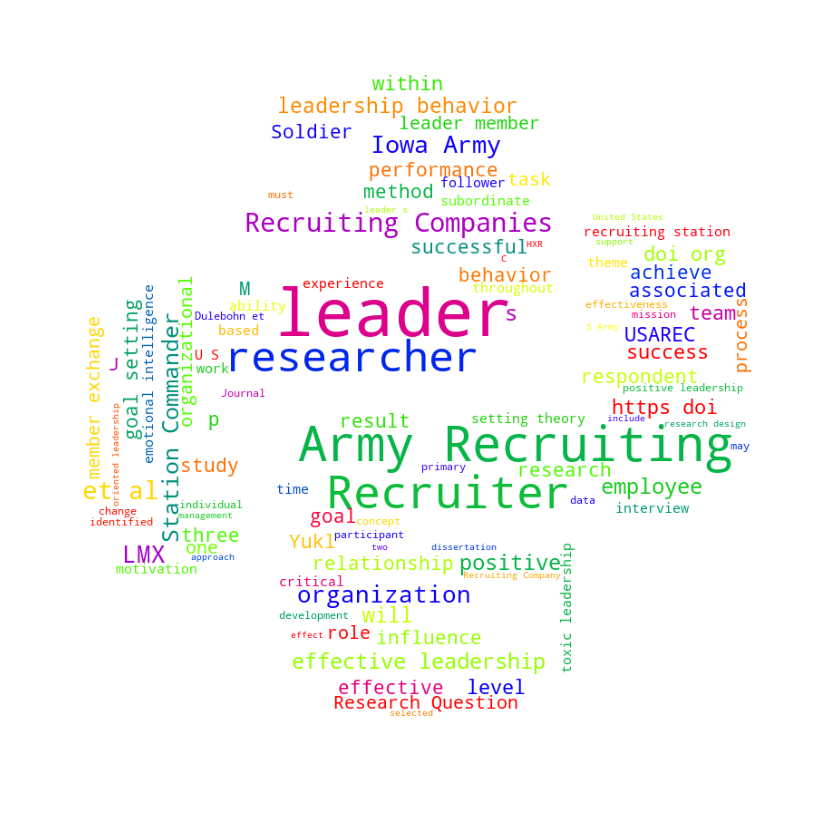

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(Diss_wordcloud)

In [25]:
import pandas as pd

In [27]:
from textatistic import Textatistic
textatistic_first = First
textatistic_diss = Diss

readability_first = Textatistic(textatistic_first)
readability_diss = Textatistic(textatistic_diss)

%precision 3
readability_first.dict()
readability_diss.dict()

first_df = pd.DataFrame([readability_first.dict()]) 
diss_df = pd.DataFrame([readability_diss.dict()]) 
print(first_df)

   char_count  word_count  sent_count  sybl_count  notdalechall_count  \
0        4576         969          89        1227                 168   

   polysyblword_count  flesch_score  fleschkincaid_score  gunningfog_score  \
0                  44     88.658968             3.597975          6.171362   

   smog_score  dalechall_score  
0    7.145864         6.914112  


In [33]:
diss_df['Title'] = 'Values'
diss_dfp = pd.pivot_table(diss_df, columns = 'Title').astype(int)
diss_dfp

Title,Values
char_count,249937
dalechall_score,11
flesch_score,47
fleschkincaid_score,9
gunningfog_score,13
notdalechall_count,18389
polysyblword_count,8793
sent_count,3282
smog_score,12
sybl_count,70593


In [35]:
first_df['Title'] = 'Values'
first_dfp = pd.pivot_table (first_df, columns = 'Title').astype(int)
diss_dfp['Values'] = diss_dfp['Values'].round(2)
first_dfp.head(13)

Title,Values
char_count,4576
dalechall_score,6
flesch_score,88
fleschkincaid_score,3
gunningfog_score,6
notdalechall_count,168
polysyblword_count,44
sent_count,89
smog_score,7
sybl_count,1227


In [36]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

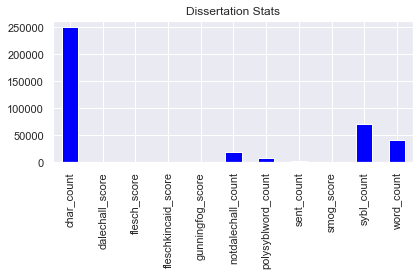

In [39]:
sns.set()
diss_dfp.plot.bar(color = 'blue', legend=False)
#diss_dfp.set_xticklabels(rotation=0)
plt.title('Dissertation Stats')
plt.gcf().tight_layout()

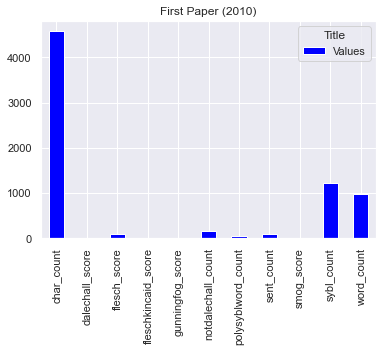

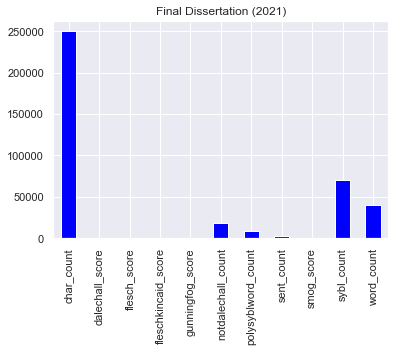

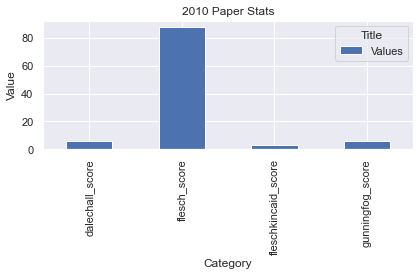

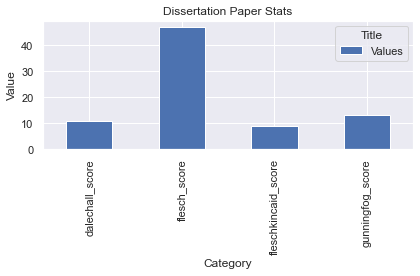

In [40]:
ax1 = first_dfp.plot.bar(color='blue', legend=True, title='First Paper (2010)')
ax2 = diss_dfp.plot.bar(color = 'blue', legend=False, title='Final Dissertation (2021)')


fig = first_dfp[1:5].plot(kind='bar')
fig.set_title('Amount Frequency')
fig.set_xlabel('Category')
fig.set_ylabel('Value')
#t
plt.title('2010 Paper Stats')
ax3 = plt.gcf().tight_layout()

fig = diss_dfp[1:5].plot(kind='bar')
fig.set_title('Amount Frequency')
fig.set_xlabel('Category')
fig.set_ylabel('Value')
plt.title('Dissertation Paper Stats')
ax4 = plt.gcf().tight_layout()

In [42]:
# fig, ((first_dfp[1:5], diss_dfp[1:5]), (first_dfp, diss_dfp)) = plt.subplots(2, 2)
# fig.suptitle('Sharing x per column, y per row')
# ax1.plot()
# ax2.plot( 'tab:orange')
# ax3.plot('tab:green')
# ax4.plot('tab:red')

# for ax in fig.get_axes():
#     ax.label_outer()